In [1]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import time
import os
import datetime
ts = '{:%Y%m%d%H%M%S}'.format(datetime.datetime.now())

from IPython.display import Image
from time import sleep
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from amb_sdk.sdk import DarwinSdk

%matplotlib inline

In [2]:
ds = DarwinSdk()
ds.set_url('https://amb-demo-api.sparkcognition.com/v1/')
status, msg = ds.auth_login_user('EMMIECHNG@UTEXAS.EDU', 'QMCZgepW6u')

if not status:
    print(msg)

In [3]:
dataset_name = 'Speed_Dating_Clean.csv'
data = pd.read_csv("../Data/Speed_Dating_Clean.csv")

In [4]:
data.head()

,Unnamed: 0,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,...,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_matches,like,guess_prob_liked,met,decision,decision_o,match
0,0,0,21.0,27.0,6,3,1,3,0,2.0,...,1.0,0.14,3.0,4.0,7.0,6.0,0.0,1,0,0
1,1,0,21.0,22.0,1,1,1,3,0,2.0,...,1.0,0.54,3.0,4.0,7.0,5.0,1.0,1,0,0
2,2,0,21.0,22.0,1,1,1,1,1,2.0,...,1.0,0.16,3.0,4.0,7.0,0.0,1.0,1,1,1
3,3,0,21.0,23.0,2,2,1,3,0,2.0,...,1.0,0.61,3.0,4.0,7.0,6.0,0.0,1,1,1
4,4,0,21.0,24.0,3,2,1,4,0,2.0,...,1.0,0.21,3.0,4.0,6.0,6.0,0.0,1,1,1


In [5]:
data.match.value_counts()

0    6870
1    1350
Name: match, dtype: int64

In [6]:
data.describe()

,Unnamed: 0,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,...,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_matches,like,guess_prob_liked,met,decision,decision_o,match
count,8220.000000,8220.000000,8220.000000,8220.000000,8220.000000,8220.000000,8220.000000,8220.00000,8220.000000,8220.000000,...,8220.000000,8220.000000,8220.000000,8220.000000,8220.000000,8220.000000,8220.000000,8220.000000,8220.000000,8220.000000
mean,4212.978467,0.500608,26.353830,26.359971,3.837348,2.327859,2.677007,2.68017,0.400973,3.786861,...,4.345742,0.196010,5.530262,2.760255,5.963954,5.020073,0.047567,0.419830,0.419465,0.164234
std,2416.638105,0.500030,3.559995,3.554904,3.594644,1.037995,1.111031,1.11304,0.490125,2.847048,...,2.717269,0.303539,1.730610,2.535208,2.068454,2.299052,0.276949,0.493561,0.493501,0.370510
min,0.000000,0.000000,18.000000,18.000000,0.000000,1.000000,1.000000,1.00000,0.000000,0.000000,...,0.000000,-0.830000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2136.750000,0.000000,24.000000,24.000000,1.000000,1.000000,2.000000,2.00000,0.000000,1.000000,...,2.000000,-0.020000,5.000000,1.000000,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,4191.500000,1.000000,26.000000,26.000000,3.000000,2.000000,3.000000,3.00000,0.000000,3.000000,...,4.000000,0.210000,6.000000,2.000000,6.000000,5.000000,0.000000,0.000000,0.000000,0.000000
75%,6322.250000,1.000000,28.000000,28.000000,5.000000,3.000000,3.000000,3.00000,1.000000,6.000000,...,7.000000,0.430000,7.000000,4.000000,7.000000,7.000000,0.000000,1.000000,1.000000,0.000000
max,8377.000000,1.000000,55.000000,55.000000,32.000000,4.000000,5.000000,5.00000,1.000000,10.000000,...,10.000000,0.910000,10.000000,18.000000,10.000000,10.000000,8.000000,1.000000,1.000000,1.000000


In [7]:
status, dataset = ds.upload_dataset("../Data/Speed_Dating_Clean.csv")

if not status:
    print(dataset)

In [8]:
ds.lookup_dataset()

(True,
 [{'name': 'Speed_Dating_Clean.csv',
   'mbytes': 2.1142759323120117,
   'minimum_recommeded_train_time': '5 minutes',
   'updated_at': '2019-04-11T13:51:41.541573',
   'categorical': None,
   'sequential': None,
   'imbalanced': None}])

In [9]:
target = "match"
status, job_id = ds.clean_data(dataset_name, target = target)

if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-11T13:51:42.885514', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': ['c82b37bf7997455ebc197890729e238c'], 'model_name': None, 'job_error': None}
{'status': 'Complete', 'starttime': '2019-04-11T13:51:42.885514', 'endtime': '2019-04-11T13:51:53.43086', 'percent_complete': 100, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': ['c82b37bf7997455ebc197890729e238c'], 'model_name': None, 'job_error': ''}


# Darwin Supervised Classification

In [10]:
# Darwin Supervised Classification
model = target + "_model" + ts
status, job_id = ds.create_model(dataset_names = dataset_name,
                                 model_name = model,
                                 max_train_time = '00:02')

if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-11T13:51:59.189169', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': None, 'model_name': 'match_model20190412025132', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-11T13:51:59.189169', 'endtime': None, 'percent_complete': 7, 'job_type': 'TrainModel', 'loss': 0.3132784068584442, 'generations': 1, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': None, 'model_name': 'match_model20190412025132', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-11T13:51:59.189169', 'endtime': None, 'percent_complete': 13, 'job_type': 'TrainModel', 'loss': 0.3132784068584442, 'generations': 2, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': None, 'model_name': 'match_model20190412025132', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-11T13:51:59.189169', 'endtime': None, 'percent_

In [11]:
status, job_id = ds.resume_training_model(dataset_names = dataset_name, 
                                         model_name = model,
                                         max_train_time = '00:05')

if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-11T13:54:16.17318', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss': 0.3132784068584442, 'generations': 2, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': None, 'model_name': 'match_model20190412025132', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-11T13:54:16.17318', 'endtime': None, 'percent_complete': 1, 'job_type': 'UpdateModel', 'loss': 0.3132784068584442, 'generations': 4, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': None, 'model_name': 'match_model20190412025132', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-11T13:54:16.17318', 'endtime': None, 'percent_complete': 2, 'job_type': 'UpdateModel', 'loss': 0.3132784068584442, 'generations': 5, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': None, 'model_name': 'match_model20190412025132', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-11T13:54:16.17318', 'endtime': Non

In [12]:
status, artifact = ds.analyze_model(model)
sleep(1)
if status:
    ds.wait_for_job(artifact['job_name'])
else:
    print(artifact)
status, feature_importance = ds.download_artifact(artifact['artifact_name'])

{'status': 'Running', 'starttime': '2019-04-11T13:59:49.292738', 'endtime': None, 'percent_complete': 0, 'job_type': 'AnalyzeModel', 'loss': 5.819041420147235e-08, 'generations': 5, 'dataset_names': None, 'artifact_names': ['d88427d13472446394ae05384c41c0a0'], 'model_name': 'match_model20190412025132', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-11T13:59:49.292738', 'endtime': '2019-04-11T13:59:51.377993', 'percent_complete': 100, 'job_type': 'AnalyzeModel', 'loss': 5.819041420147235e-08, 'generations': 5, 'dataset_names': None, 'artifact_names': ['d88427d13472446394ae05384c41c0a0'], 'model_name': 'match_model20190412025132', 'job_error': ''}


In [13]:
feature_importance[:10]

decision_o = 1              0.194510
decision = 1                0.176940
like                        0.029740
attractive_partner          0.028867
attractive_o                0.027861
funny_o                     0.022413
funny_partner               0.019953
guess_prob_liked            0.018644
shared_interests_partner    0.018415
shared_interests_o          0.017793
dtype: float64

In [14]:
status, artifact = ds.run_model(dataset_name, model)
sleep(1)
ds.wait_for_job(artifact['job_name'])

{'status': 'Running', 'starttime': '2019-04-11T14:00:07.344325', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 5.819041420147235e-08, 'generations': 5, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': ['c8914cd9d2d745b798db14855c9625e0'], 'model_name': 'match_model20190412025132', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-11T14:00:07.344325', 'endtime': '2019-04-11T14:00:08.966154', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 5.819041420147235e-08, 'generations': 5, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': ['c8914cd9d2d745b798db14855c9625e0'], 'model_name': 'match_model20190412025132', 'job_error': ''}


(True, 'Job completed')

In [15]:
status, prediction = ds.download_artifact(artifact['artifact_name'])
prediction.head()

,match,prob_0,prob_1
0,0,1.000000e+00,1.220000e-08
1,0,1.000000e+00,2.050000e-08
2,1,8.700000e-09,1.000000e+00
3,1,4.100000e-09,1.000000e+00
4,1,6.200000e-09,1.000000e+00


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6870
           1       1.00      1.00      1.00      1350

   micro avg       1.00      1.00      1.00      8220
   macro avg       1.00      1.00      1.00      8220
weighted avg       1.00      1.00      1.00      8220



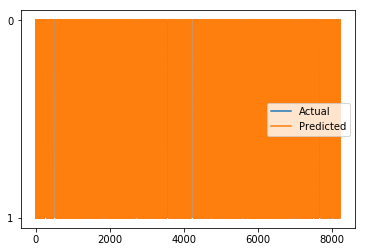

In [16]:
unq = prediction[target].unique()[::-1]
p = np.zeros((len(prediction),))
a = np.zeros((len(prediction),))
for i,q in enumerate(unq):
    p += i*(prediction[target] == q).values
    a += i*(data[target] == q).values
#Plot predictions vs actual
plt.plot(a)
plt.plot(p)
plt.legend(['Actual','Predicted'])
plt.yticks([i for i in range(len(unq))],[q for q in unq]);
print(classification_report(data[target], prediction[target]))

In [17]:
status, model_type = ds.lookup_model_name(model)
print(model_type['description']['best_genome'])

[{'layer 1': {'type': 'LinearGene', 'parameters': {'activation': 'relu', 'numunits': 461}}}, {'layer 2': {'type': 'LinearGene', 'parameters': {'activation': 'relu', 'numunits': 2}}}]


# Darwin Supervised Regression

In [18]:
# Darwin Supervised Regression
model = target + "_model0" + ts
status, job_id = ds.create_model(dataset_names = dataset_name,
                                 model_name =  model,
                                 max_train_time = '00:02')
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-11T14:00:26.638472', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': None, 'model_name': 'match_model020190412025132', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-11T14:00:26.638472', 'endtime': None, 'percent_complete': 7, 'job_type': 'TrainModel', 'loss': 0.31332650780677795, 'generations': 2, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': None, 'model_name': 'match_model020190412025132', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-11T14:00:26.638472', 'endtime': None, 'percent_complete': 7, 'job_type': 'TrainModel', 'loss': 0.31332650780677795, 'generations': 2, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': None, 'model_name': 'match_model020190412025132', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-11T14:00:26.638472', 'endtime': None, 'perc

In [19]:
status, job_id = ds.resume_training_model(dataset_names = dataset_name,
                                          model_name = model,
                                          max_train_time = '00:05')
                                          
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Taken', 'starttime': '2019-04-11T14:02:44.252086', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss': 0.31332650780677795, 'generations': 2, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': None, 'model_name': 'match_model020190412025132', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-11T14:02:44.252086', 'endtime': None, 'percent_complete': 1, 'job_type': 'UpdateModel', 'loss': 0.31332650780677795, 'generations': 4, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': None, 'model_name': 'match_model020190412025132', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-11T14:02:44.252086', 'endtime': None, 'percent_complete': 3, 'job_type': 'UpdateModel', 'loss': 0.31332650780677795, 'generations': 5, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': None, 'model_name': 'match_model020190412025132', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-11T14:02:44.252086', 'endtime

In [20]:
status, artifact = ds.analyze_model(model)
sleep(1)
if status:
    ds.wait_for_job(artifact['job_name'])
else:
    print(artifact)
status, feature_importance = ds.download_artifact(artifact['artifact_name'])

{'status': 'Running', 'starttime': '2019-04-11T14:08:17.440411', 'endtime': None, 'percent_complete': 0, 'job_type': 'AnalyzeModel', 'loss': 7.87632805960519e-08, 'generations': 5, 'dataset_names': None, 'artifact_names': ['53ba06b67d5c4d0c913606ac81b9c1f4'], 'model_name': 'match_model020190412025132', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-11T14:08:17.440411', 'endtime': '2019-04-11T14:08:19.351086', 'percent_complete': 100, 'job_type': 'AnalyzeModel', 'loss': 7.87632805960519e-08, 'generations': 5, 'dataset_names': None, 'artifact_names': ['53ba06b67d5c4d0c913606ac81b9c1f4'], 'model_name': 'match_model020190412025132', 'job_error': ''}


In [21]:
feature_importance[:10]

decision = 1                0.191843
decision_o = 1              0.180428
shared_interests_o          0.031752
like                        0.027454
attractive_partner          0.027270
funny_o                     0.023393
funny_partner               0.021895
attractive_o                0.021524
shared_interests_partner    0.020063
guess_prob_liked            0.017229
dtype: float64

In [22]:
status, artifact = ds.run_model(dataset_name, model)
sleep(1)
ds.wait_for_job(artifact['job_name'])

{'status': 'Running', 'starttime': '2019-04-11T14:08:35.582107', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 7.87632805960519e-08, 'generations': 5, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': ['8ddca46bfd634aa9bd98c77d862bd5a8'], 'model_name': 'match_model020190412025132', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-11T14:08:35.582107', 'endtime': '2019-04-11T14:08:37.013844', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 7.87632805960519e-08, 'generations': 5, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': ['8ddca46bfd634aa9bd98c77d862bd5a8'], 'model_name': 'match_model020190412025132', 'job_error': ''}


(True, 'Job completed')

In [23]:
status, prediction = ds.download_artifact(artifact['artifact_name'])
prediction.head()

,match,prob_0,prob_1
0,0,1.000000e+00,9.000000e-09
1,0,1.000000e+00,1.500000e-08
2,1,4.000000e-09,1.000000e+00
3,1,3.800000e-09,1.000000e+00
4,1,5.600000e-09,1.000000e+00


R^2 :  1.0


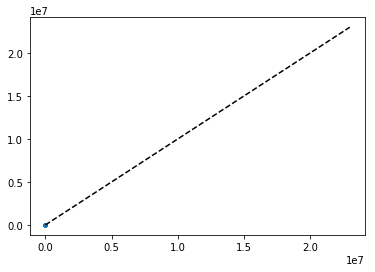

In [24]:
plt.plot(data[target], prediction[target], '.')
plt.plot([0,2.3e7],[0,2.3e7],'--k')
print('R^2 : ', r2_score(data[target], prediction[target]))

In [25]:
status, model_type = ds.lookup_model_name(model)
print(model_type['description']['best_genome'])

[{'layer 1': {'type': 'LinearGene', 'parameters': {'activation': 'relu', 'numunits': 299}}}, {'layer 2': {'type': 'LinearGene', 'parameters': {'activation': 'selu', 'numunits': 2}}}]


In [26]:
'''
ds.delete_all_models()
ds.delete_all_datasets()
ds.delete_all_artifacts()
'''

'\nds.delete_all_models()\nds.delete_all_datasets()\nds.delete_all_artifacts()\n'

In [27]:
ds.lookup_job_status()
#ds.stop_job("fab6ca38fd424c80ba8d8afd881633bf")
#ds.delete_job("fab6ca38fd424c80ba8d8afd881633bf")

(True,
 [{'job_name': '2239f51414d742ed948a7438744600bf',
   'job_id': '34b371e0-5c8d-11e9-b8f9-1b63252f24d5',
   'status': 'Complete',
   'starttime': '2019-04-11T14:08:35.582107',
   'endtime': '2019-04-11T14:08:37.013844',
   'percent_complete': 100,
   'job_type': 'RunModel',
   'loss': 7.87632805960519e-08,
   'generations': 5,
   'dataset_names': ['Speed_Dating_Clean.csv'],
   'artifact_names': ['8ddca46bfd634aa9bd98c77d862bd5a8'],
   'model_name': 'match_model020190412025132',
   'job_error': ''},
  {'job_name': '4d0a7e872a694559b9f8c26ce25d6223',
   'job_id': '29e33aac-5c8d-11e9-b8f9-abf049934e3b',
   'status': 'Complete',
   'starttime': '2019-04-11T14:08:17.440411',
   'endtime': '2019-04-11T14:08:19.351086',
   'percent_complete': 100,
   'job_type': 'AnalyzeModel',
   'loss': 7.87632805960519e-08,
   'generations': 5,
   'dataset_names': None,
   'artifact_names': ['53ba06b67d5c4d0c913606ac81b9c1f4'],
   'model_name': 'match_model020190412025132',
   'job_error': ''},
  {'j